# analyze trips that start within 553m around u5 stops

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

path = r"C:\Users\tomsc\matsim\hamburg\scenario-u5\hamburg-v3.0-10pct-base.output_trips.csv\hamburg-v3.0-10pct-base.output_trips.csv"
# Lesen der legs.csv Datei
trips_df = pd.read_csv(path, delimiter=";")

C:\Users\tomsc\AppData\Local\Temp\ipykernel_4508\1109686189.py:10: DtypeWarning: Columns (0,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_df = pd.read_csv(path, delimiter=";")


In [2]:
u5_trips = pd.read_csv('u5_trips.csv')

In [3]:
u5_trips['U5'] = True

In [4]:
u5_trips.head()

,trip_id,person,U5
0,100242_4,100242,True
1,100242_5,100242,True
2,100299_1,100299,True
3,10038_2,10038,True
4,10038_3,10038,True


In [5]:
trips_df['U5'] = False

In [6]:
trips_df.head()

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,...,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop,U5
0,10,1,10_1,09:40:53,01:01:24,00:00:00,74655,62452,car,car,...,584925770008f,606877.292289,5.982422e+06,NaN,7884380060000f,567977.597178,5.933565e+06,NaN,NaN,False
1,10,2,10_2,19:55:04,01:00:59,00:00:00,74944,62411,car,car,...,7884380060000f,567977.597178,5.933565e+06,NaN,584925770008f,606757.185177,5.982467e+06,NaN,NaN,False
2,100,1,100_1,05:52:14,00:30:51,00:00:00,5811,4109,bike,bike,...,2316064800006f,596954.623829,5.984601e+06,NaN,5523673040006f,601031.565952,5.985119e+06,NaN,NaN,False
3,100,2,100_2,15:02:18,00:30:51,00:00:00,5811,4007,bike,bike,...,5523673040006f,601031.565952,5.985119e+06,NaN,2316064800006f,597059.750379,5.984586e+06,NaN,NaN,False
4,100002,1,100002_1,11:33:30,00:05:20,00:00:00,339,210,walk,walk,...,40704970005f,565856.296980,5.956417e+06,NaN,7446824860010f,565688.006149,5.956543e+06,NaN,NaN,False


In [7]:
# Perform a left merge to combine trips_df with u5_trips_df based on trip_id
merged_df = trips_df.merge(u5_trips[['trip_id', 'U5']], on='trip_id', how='left', suffixes=('', '_u5'))

# If there's a matching U5 from u5_trips_df, overwrite the U5 column in trips_df
merged_df['U5'] = merged_df['U5_u5'].combine_first(merged_df['U5'])

# Drop the temporary 'U5_u5' column
merged_df.drop(columns=['U5_u5'], inplace=True)

In [8]:
merged_df.head()

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,...,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop,U5
0,10,1,10_1,09:40:53,01:01:24,00:00:00,74655,62452,car,car,...,584925770008f,606877.292289,5.982422e+06,NaN,7884380060000f,567977.597178,5.933565e+06,NaN,NaN,False
1,10,2,10_2,19:55:04,01:00:59,00:00:00,74944,62411,car,car,...,7884380060000f,567977.597178,5.933565e+06,NaN,584925770008f,606757.185177,5.982467e+06,NaN,NaN,False
2,100,1,100_1,05:52:14,00:30:51,00:00:00,5811,4109,bike,bike,...,2316064800006f,596954.623829,5.984601e+06,NaN,5523673040006f,601031.565952,5.985119e+06,NaN,NaN,False
3,100,2,100_2,15:02:18,00:30:51,00:00:00,5811,4007,bike,bike,...,5523673040006f,601031.565952,5.985119e+06,NaN,2316064800006f,597059.750379,5.984586e+06,NaN,NaN,False
4,100002,1,100002_1,11:33:30,00:05:20,00:00:00,339,210,walk,walk,...,40704970005f,565856.296980,5.956417e+06,NaN,7446824860010f,565688.006149,5.956543e+06,NaN,NaN,False


In [9]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_df,
    geometry=gpd.points_from_xy(merged_df['start_x'], merged_df['start_y']),
    crs="EPSG:25832")

In [10]:
gdf.head()

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,...,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop,U5,geometry
0,10,1,10_1,09:40:53,01:01:24,00:00:00,74655,62452,car,car,...,606877.292289,5.982422e+06,NaN,7884380060000f,567977.597178,5.933565e+06,NaN,NaN,False,POINT (606877.292 5982422.367)
1,10,2,10_2,19:55:04,01:00:59,00:00:00,74944,62411,car,car,...,567977.597178,5.933565e+06,NaN,584925770008f,606757.185177,5.982467e+06,NaN,NaN,False,POINT (567977.597 5933564.695)
2,100,1,100_1,05:52:14,00:30:51,00:00:00,5811,4109,bike,bike,...,596954.623829,5.984601e+06,NaN,5523673040006f,601031.565952,5.985119e+06,NaN,NaN,False,POINT (596954.624 5984600.643)
3,100,2,100_2,15:02:18,00:30:51,00:00:00,5811,4007,bike,bike,...,601031.565952,5.985119e+06,NaN,2316064800006f,597059.750379,5.984586e+06,NaN,NaN,False,POINT (601031.566 5985119.050)
4,100002,1,100002_1,11:33:30,00:05:20,00:00:00,339,210,walk,walk,...,565856.296980,5.956417e+06,NaN,7446824860010f,565688.006149,5.956543e+06,NaN,NaN,False,POINT (565856.297 5956417.104)


In [11]:
# Read stations and convert to gdf
path = r'C:\Users\tomsc\matsim\hamburg\analysis\matsim-hamburg-u5.csv'
u5_stops = pd.read_csv(path, delimiter=',')

gdf_u5_stops = gpd.GeoDataFrame(
    u5_stops,
    geometry=gpd.points_from_xy(u5_stops['x'], u5_stops['y']),
    crs="EPSG:25832")

gdf_u5_stops.head(2)

,Haltestelle,ID,x,y,isNew,Change to:,geometry
0,Bramfeld,NaN,571219,5941120,True,NaN,POINT (571219.000 5941120.000)
1,Steilshoop,NaN,570058,5940701,True,NaN,POINT (570058.000 5940701.000)


In [12]:
# Create buffer around U5 stops
gdf_u5_stops['buffer'] = gdf_u5_stops.geometry.buffer(553)

# Convert the buffer into a GeoDataFrame
u5_buffers_gdf = gpd.GeoDataFrame(gdf_u5_stops[['Haltestelle', 'buffer']], geometry='buffer', crs=gdf_u5_stops.crs)

In [13]:
u5_buffers_gdf.head()

,Haltestelle,buffer
0,Bramfeld,"POLYGON ((571772.000 5941120.000, 571769.337 5..."
1,Steilshoop,"POLYGON ((570611.000 5940701.000, 570608.337 5..."
2,Barmbek Nord/Nordheimstraße,"POLYGON ((569312.000 5940450.000, 569309.337 5..."
3,Sengelmannstraße,"POLYGON ((568169.000 5940552.000, 568166.337 5..."
4,City Nord (Stadtpark),"POLYGON ((567867.000 5939747.000, 567864.337 5..."


In [14]:
# Perform the spatial join: Find trip start locations within buffer of U5 stops
trips_within_buffer = gpd.sjoin(gdf, u5_buffers_gdf, how='inner', op='within')

C:\Users\tomsc\.conda\envs\geo_env\Lib\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [15]:
trips_within_buffer.head(4)

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,...,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop,U5,geometry,index_right,Haltestelle
49,100027,2,100027_2,09:37:28,00:06:57,00:00:00,441,304,walk,walk,...,NaN,1427091870006f,564538.730850,5.938872e+06,NaN,NaN,False,POINT (564490.138 5938571.643),17,UKE*
50,100027,3,100027_3,10:42:01,00:06:57,00:00:00,441,304,walk,walk,...,NaN,53687860005f,564490.138044,5.938572e+06,NaN,NaN,False,POINT (564538.731 5938871.980),17,UKE*
51,100027,4,100027_4,12:21:00,00:32:15,00:00:00,23713,18055,car,car,...,NaN,1522364110004f,566085.001200,5.956557e+06,NaN,NaN,False,POINT (564490.138 5938571.643),17,UKE*
193,100149,2,100149_2,12:12:29,00:30:48,00:00:00,24832,18672,car,car,...,NaN,246154520010f,566111.455070,5.957097e+06,NaN,NaN,False,POINT (564396.307 5938503.448),17,UKE*


In [16]:
# Filter to exclude the commercial modes
trips_within_buffer = trips_within_buffer[~trips_within_buffer['main_mode'].str.startswith('commercial_')]

In [17]:
trips_within_buffer.to_csv('trips_within_buffer_basecase.csv')

C:\Users\tomsc\AppData\Local\Temp\ipykernel_4508\499481856.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


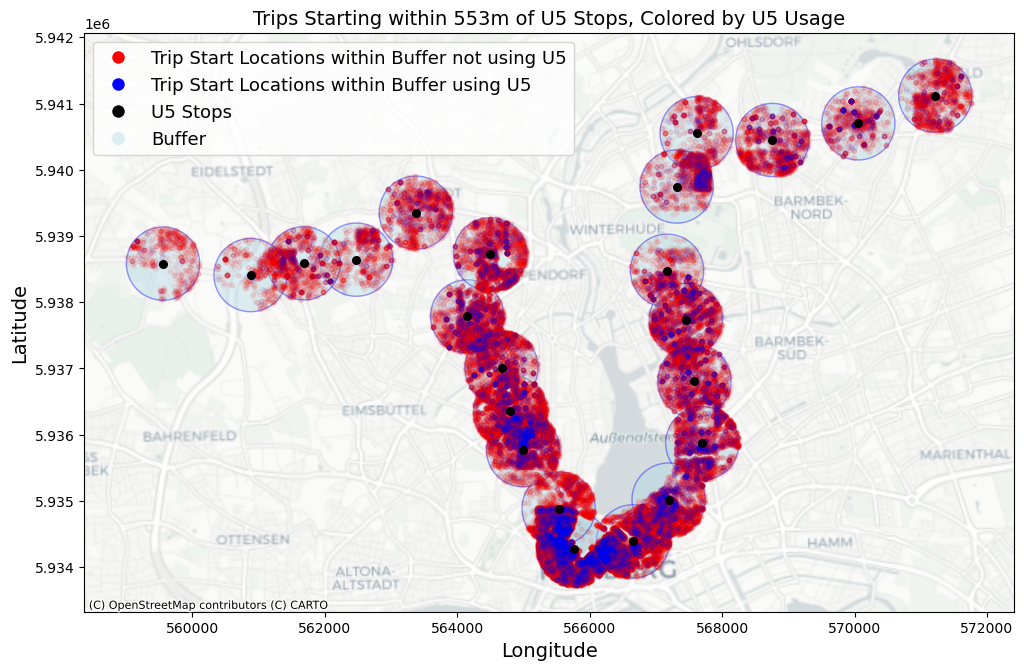

In [18]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the U5 stops with their 700m buffers
u5_buffers_gdf.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.4, label='Buffer')

# Plot the trip start locations that fall within the 700m buffer
#trips_within_700m.plot(ax=ax, color='red', label='Trip Start Locations within 700m', alpha=0.1)

trips_false_u5 = trips_within_buffer[trips_within_buffer['U5'] == False]
trips_true_u5 = trips_within_buffer[trips_within_buffer['U5'] == True]

# Plot trips with 'False' in 'U5' (in red)
trips_false_u5.plot(ax=ax, color='red', markersize=10, label='Trip Start Locations within Buffer not using U5', alpha=0.05)

# Plot trips with 'True' in 'U5' (in blue)
trips_true_u5.plot(ax=ax, color='blue', markersize=10, label='Trip Start Locations within Buffer using U5', alpha=0.05)

# Plot the U5 stop locations
gdf_u5_stops.plot(ax=ax, color='black', marker='o', label='U5 Stops', markersize=30)

# Customize the legend: setting alpha=1 for legend markers
handles, labels = ax.get_legend_handles_labels()

# Create custom handles for the legend
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=1, label='Trip Start Locations within Buffer not using U5'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=1, label='Trip Start Locations within Buffer using U5'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, alpha=1, label='U5 Stops'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, alpha=0.4, label='Buffer')]

# Add the custom handles to the legend
plt.legend(handles=custom_handles, loc='upper left', fontsize=13)

plt.title('Trips Starting within 553m of U5 Stops, Colored by U5 Usage', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
#plt.xticks([])
#plt.yticks([])
# Add Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs="EPSG:25832")

# Show the plot
plt.show()